<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" dataset.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [5]:
breast_cancer_csv = r'C:\Users\ryant\Desktop\IOD\DATA\breast-cancer-wisconsin-data.csv'
bc = pd.read_csv(breast_cancer_csv, index_col='id') #Id's are all unique so can be used as index col
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [8]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [10]:
bc.drop(['Unnamed: 32'], axis=1, inplace=True) #Drop the last column as it has all null values.

In [12]:
bc['diagnosis'].unique() #only 2 unique values in the diagnosis column

array(['M', 'B'], dtype=object)

In [14]:
bc['diagnosis'] = bc['diagnosis'].map({'M': 1, 'B': 0}) #Change diagnosis column to binary

In [16]:
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
#plot a heatmap of all the features

In [22]:
corr = bc.drop(columns=['diagnosis']).corr()

In [31]:
mask = np.triu(np.ones_like(corr, dtype=bool))

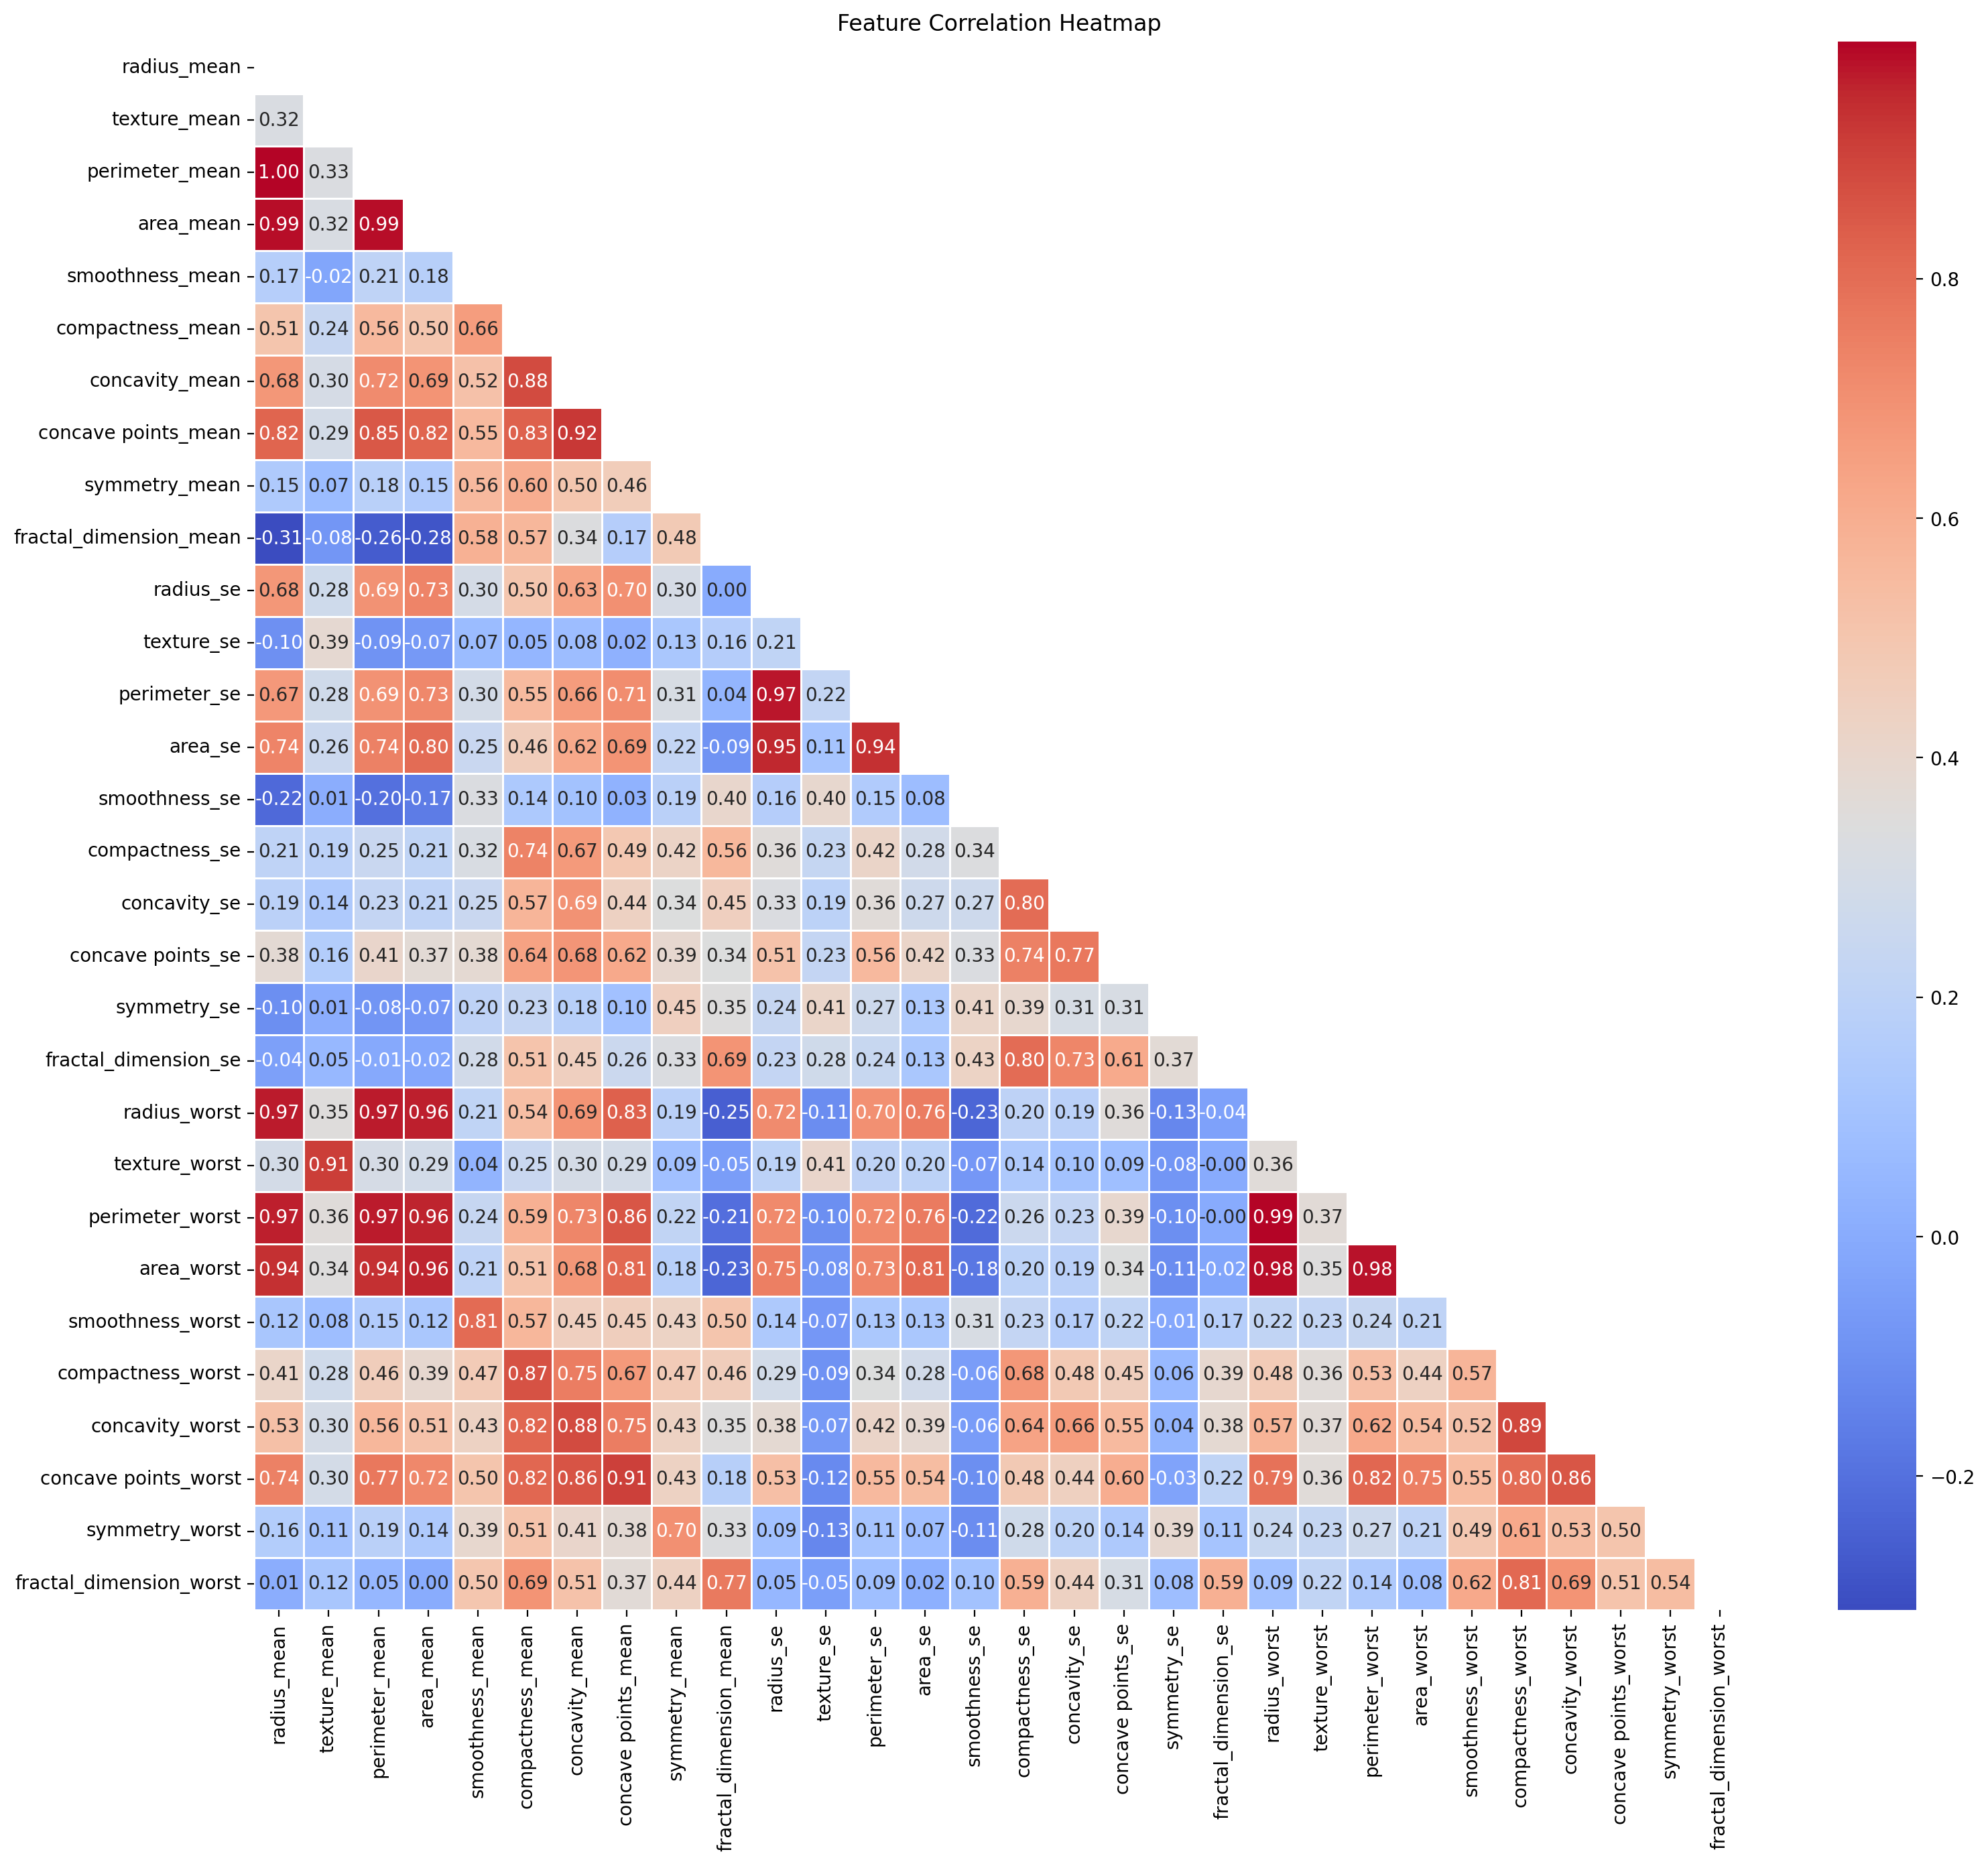

In [58]:
plt.figure(figsize=(16, 14))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, mask=mask, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. Logistic Regression Model
In this section we fit and then evaluate a logistic regression model using a number of performance metrics.

#### 3.1 Perform a train-test split and fit a logistic regression model to the training set.

In [73]:
# Define X and y
y = bc['diagnosis'] 
X = bc.drop(columns='diagnosis') #all features except for diagnosis

In [80]:
# Perform train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Fit a logistic regression model to the training set:
log_reg = LogisticRegression()

In [82]:
log_reg.fit(X_train, y_train)

C:\Users\ryant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [91]:
# predict test class:
y_pred = log_reg.predict(X_test)

# predicted test probability:
y_pp = log_reg.predict_proba(X_test)

In [93]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [103]:
y_pp

array([[5.84468796e-01, 4.15531204e-01],
       [4.18584956e-01, 5.81415044e-01],
       [9.97796991e-01, 2.20300895e-03],
       [3.15347254e-04, 9.99684653e-01],
       [1.19595873e-01, 8.80404127e-01],
       [6.70440721e-04, 9.99329559e-01],
       [1.63523746e-06, 9.99998365e-01],
       [2.54456505e-03, 9.97455435e-01],
       [9.81601153e-01, 1.83988467e-02],
       [9.86436392e-01, 1.35636081e-02],
       [9.81357584e-01, 1.86424156e-02],
       [6.60624487e-02, 9.33937551e-01],
       [1.23779226e-01, 8.76220774e-01],
       [9.89932772e-01, 1.00672284e-02],
       [6.97040465e-01, 3.02959535e-01],
       [9.05823230e-01, 9.41767698e-02],
       [9.70466466e-01, 2.95335338e-02],
       [9.81934707e-01, 1.80652931e-02],
       [9.99745668e-01, 2.54331653e-04],
       [3.24012966e-08, 9.99999968e-01],
       [9.93013431e-01, 6.98656867e-03],
       [9.60238599e-01, 3.97614006e-02],
       [1.80430121e-04, 9.99819570e-01],
       [9.80884417e-01, 1.91155827e-02],
       [7.994364

#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [141]:
# ANSWER
cm = pd.DataFrame(
    (confusion_matrix(y_test, y_pred)),
    columns=['predicted_healthy', 'predicted_cancer'],
    index=['is_healthy', 'is_cancer']
    )
cm

,predicted_healthy,predicted_cancer
is_healthy,84,4
is_cancer,4,51


In [145]:
TP = cm.loc['is_healthy', 'predicted_healthy']
FP = cm.loc['is_healthy', 'predicted_cancer']
FN = cm.loc['is_cancer', 'predicted_healthy']
TN = cm.loc['is_cancer', 'predicted_cancer']

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

True Positives (TP): 84
False Positives (FP): 4
False Negatives (FN): 4
True Negatives (TN): 51


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [147]:
# ANSWER
# use float to perform true division, not integer division
(TP + TN) / float(TP + TN + FP + FN)



0.9440559440559441

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [149]:
# ANSWER
(FP + FN) / float(TP + TN + FP + FN)

0.055944055944055944

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [151]:
# ANSWER
TP / float(FN + TP)

0.9545454545454546

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [153]:
# ANSWER
TN / (TN + FP)

0.9272727272727272

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [155]:
# ANSWER
false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.07272727272727272

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [157]:
# ANSWER
precision = TP / float(TP + FP)
precision

0.9545454545454546

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [165]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

y_pp_df = pd.DataFrame(y_pp, columns=['class_0_pp','class_1_pp'])
y_pp_df
            

,class_0_pp,class_1_pp
0,0.584469,0.415531
1,0.418585,0.581415
2,0.997797,0.002203
3,0.000315,0.999685
4,0.119596,0.880404
...,...,...
138,0.989813,0.010187
139,0.291234,0.708766
140,0.050345,0.949655
141,0.000097,0.999903


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [183]:
# For class 1, find the area under the curve
# Find fpr, tpr
y_scores = y_pp_df['class_1_pp']  # Probabilities for class 1
y_true = y_test                   # True values

fpr, tpr, thresholds = roc_curve(y_true, y_scores) #roc curve

# Find auc
roc_auc = auc(fpr, tpr)

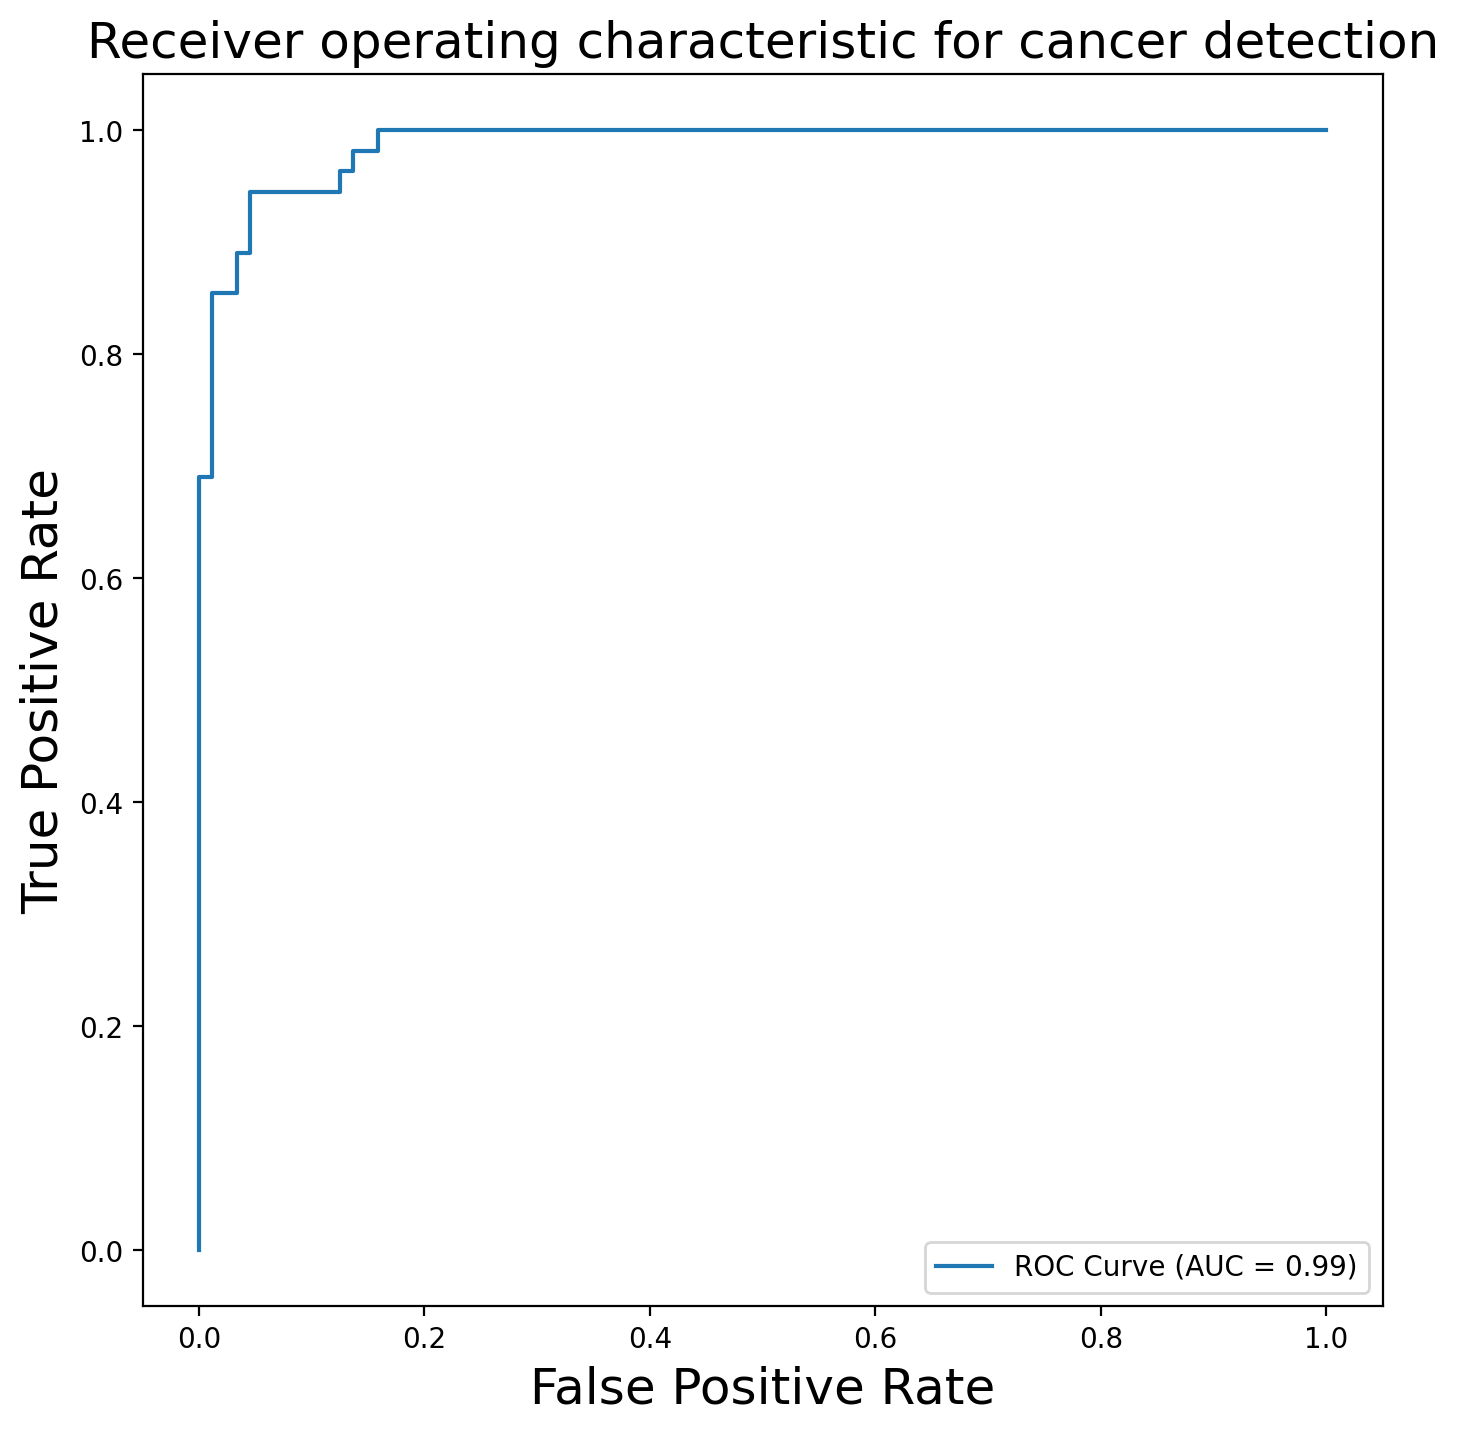

In [195]:
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



